# Project 1 CAVA
_Theodor Moroianu - 334_ 

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import src.square_extractor as sq_extractor
import src.constants as constants
import src.process_sudoku as proc_sud
import src.ocr as ocr

CLASSIC_IMAGE_PATH = "antrenare/clasic/"
JIGSAW_IMAGE_PATH = "antrenare/jigsaw/"

NUM_CLASSIC = 20
NUM_JIGSAW = 40

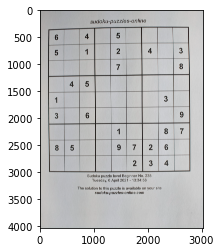

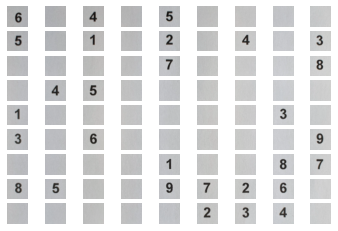

[[ 6 -1  4 -1  5 -1 -1 -1 -1]
 [ 5 -1  1 -1  2 -1  4 -1  3]
 [-1 -1 -1 -1  7 -1 -1 -1  8]
 [-1  4  5 -1 -1 -1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1  3 -1]
 [ 3 -1  6 -1 -1 -1 -1 -1  9]
 [-1 -1 -1 -1  1 -1 -1  8  7]
 [ 8  5 -1 -1  9  7  2  6 -1]
 [-1 -1 -1 -1 -1  2  3  4 -1]]


In [6]:
constants.DEBUG = False

def name(i):
    return f"{i // 10}{i % 10}.jpg"

for i in range(7, 8):
    im = cv.imread(CLASSIC_IMAGE_PATH + name(i))
    plt.imshow(im)
    plt.show()
    print(np.array(proc_sud.process_classic(im)))


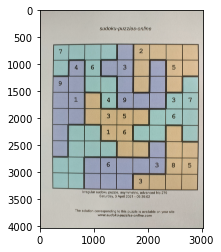

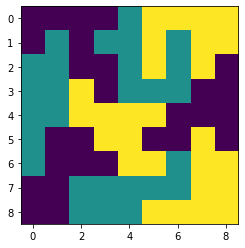

In [21]:
constants.DEBUG = False

im = cv.imread(JIGSAW_IMAGE_PATH + name(7))
plt.imshow(im)
plt.show()

import src.jigsaw_checks as js

js.checker(im)

In [12]:
import src.ocr as ocr

rez = ocr.recognize_digit(sq[1][1])
print(rez)

NameError: name 'sq' is not defined

In [7]:
im.shape

(4032, 3024, 3)

In [9]:
np.mean(im, axis=(0, 1))

array([184.95479066, 185.30008953, 185.80256075])

'2\n\x0c'

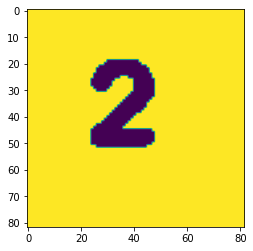

In [30]:
# constants.show_image("sq", sq[0][8])
# ocr.recognize_digit(sq[0][3])
import pytesseract as ts

# cv.imwrite("idk.png",)

image = cv.cvtColor(sq[2][0], cv.COLOR_BGR2GRAY)
_, image = cv.threshold(image, 150, 255, cv.THRESH_BINARY)

plt.imshow(image)

ts.image_to_string(image, config="--psm 10")

In [46]:
constants.DEBUG = False

def name(i):
    return f"{i // 10}{i % 10}.jpg"

for i in range(1, 41):
    if i <= NUM_CLASSIC:
        img = cv.imread(CLASSIC_IMAGE_PATH + name(i))
        square = sq_extractor.extract_square_from_image(img)
        cv.imwrite(f"Classic #{i}.jpg", square)
    if i <= NUM_JIGSAW:
        img = cv.imread(JIGSAW_IMAGE_PATH + name(i))
        square = sq_extractor.extract_square_from_image(img)
        cv.imwrite(f"Jigsaw #{i}.jpg", square)
    
aa

(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
(4, 2)
